In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
def sir(y, t, N,alpha , beta, mu):
    S, I,R = y
    dSdt = -(beta*I*S)/N
    dIdt = ((beta*I*S)/N) - (alpha*mu*I)
    dRdt = alpha*mu*I
    return dSdt, dIdt,dRdt

In [4]:
N = 4094077
alpha = 0.08
beta = 1.2
mu = 1
I0 = 5
S0 = N * 0.99999625
R0 = 0

t = np.linspace(0, 207,207)

y0 = S0,I0,R0
ret = odeint(sir, y0, t, args=(N, alpha,beta,mu))
S, I, R = ret.T

## Modelo I

$$\begin{cases}\frac{dS}{dt}=-\frac{\beta I S}{N}\\\frac{dI}{dt}=-\frac{\beta I S}{N}-\alpha vI\\\frac{dR}{dt}=\alpha vI\end{cases}$$

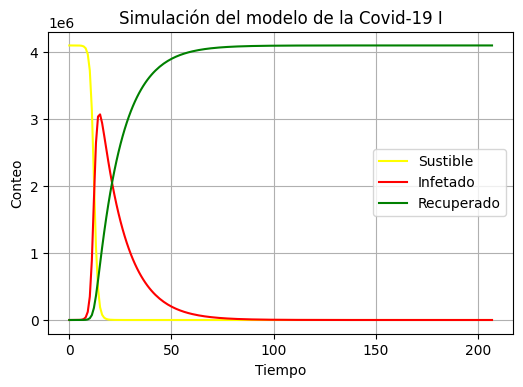

In [10]:
plt.figure(dpi=100)
plt.title("Simulación del modelo de la Covid-19 I")
plt.plot(t,S,color="yellow",label="Sustible")
plt.plot(t,I,color="red",label="Infetado")
plt.plot(t,R,color="green",label="Recuperado")
plt.legend()
plt.grid()
plt.xlabel('Tiempo')
plt.ylabel('Conteo')
plt.show()

In [11]:
def seiqr(y, t, N,alpha,beta,mu,omega,epsilon,phi):
    S, I, Q , E,R = y
    dSdt = -(beta*(omega*E + I + Q)*S)/N
    dEdt = ((beta*(omega*E + I + Q)*S)/N) - (epsilon *E)
    dIdt = (epsilon*E) - (alpha*(1- mu)*I) - (mu*phi*I)
    dQdt = mu*phi*I - alpha*Q
    dRdt = alpha*Q + alpha*(1-mu)*I
    return dSdt,dIdt,dQdt,dEdt,dRdt

In [12]:
promedioNotificionRetrasado = 5
omega = 0.2
epsilon = 0.3
phi = 1/promedioNotificionRetrasado
Q0 = 0
E0 = 10

y0 = S0,I0,Q0,E0,R0
ret = odeint(seiqr, y0, t, args=( N,alpha,beta,mu,omega,epsilon,phi))
S, I, Q, E,R = ret.T

## Modelo II

$$\begin{cases}\frac{dS}{dt}=-\frac{\beta (\omega E + I + Q) S}{N}\\\frac{dE}{dt}=\frac{\beta (\omega E + I + Q) S}{N}-\varepsilon \tau E\\\frac{dI}{dt}=\varepsilon \tau E - \alpha(1-v)I - v \varphi I\\\frac{dQ}{dt}=v \varphi I - \alpha Q\\\frac{dR}{dt}=a Q + \alpha (1-v) I\\\end{cases}$$

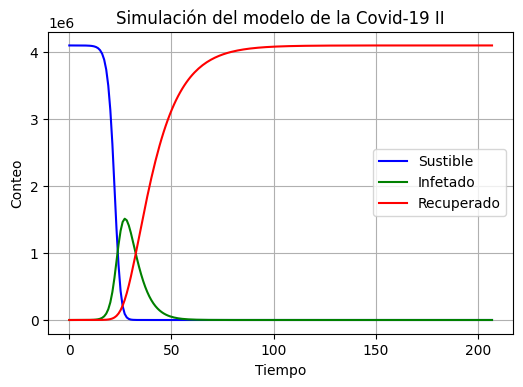

In [13]:
plt.figure(dpi=100)
plt.title('Simulación del modelo de la Covid-19 II')
plt.plot(t,S,color="blue",label="Sustible")
plt.plot(t,I,color="green",label="Infetado")
plt.plot(t,R,color="red",label="Recuperado")
plt.grid()
plt.xlabel('Tiempo')
plt.ylabel('Conteo')
plt.legend()
plt.show()